In [57]:
from PIL import Image
import requests
from io import BytesIO
import gzip
# import init
import pandas as pd
import import_ipynb
# import fantasy_functions as ff
pd.set_option('display.max_columns', 999)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [171]:
YEARS = [2019]

In [172]:
data = pd.DataFrame()

for i in YEARS:  
    i_data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(i) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    data = data.append(i_data, sort=True)

In [173]:
roster_data = pd.read_csv('https://raw.githubusercontent.com/guga31bb/nflfastR-data/master/roster-data/roster.csv?raw=True',
                          low_memory=False)


In [174]:
roster_data[roster_data['teamPlayers.displayName'] == 'Matt Ryan']

,team.season,teamPlayers.displayName,teamPlayers.firstName,teamPlayers.middleName,teamPlayers.lastName,teamPlayers.suffix,teamPlayers.status,teamPlayers.positionGroup,teamPlayers.position,teamPlayers.nflId,teamPlayers.esbId,teamPlayers.gsisId,teamPlayers.birthDate,teamPlayers.homeTown,teamPlayers.collegeId,teamPlayers.collegeName,teamPlayers.jerseyNumber,teamPlayers.height,teamPlayers.weight,team.teamId,team.abbr,team.cityState,team.fullName,team.nick,team.conferenceAbbr,team.divisionAbbr,teamPlayers.headshot_url,teamPlayers.profile_url
20451,2008,Matt Ryan,Matt,Thomas,Ryan,NaN,ACT,QB,QB,310,RYA238179,00-0026143,05/17/1985,"Exton, PA",3083,Boston College,2.0,6-4,220.0,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCS,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/mattryan/310/profile
23263,2009,Matt Ryan,Matt,Thomas,Ryan,NaN,ACT,QB,QB,310,RYA238179,00-0026143,05/17/1985,"Exton, PA",3083,Boston College,2.0,6-4,213.0,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCS,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/mattryan/310/profile
25962,2010,Matt Ryan,Matt,Thomas,Ryan,NaN,ACT,QB,QB,310,RYA238179,00-0026143,05/17/1985,"Exton, PA",3083,Boston College,2.0,6-4,220.0,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCS,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/mattryan/310/profile
28732,2011,Matt Ryan,Matt,Thomas,Ryan,NaN,ACT,QB,QB,310,RYA238179,00-0026143,05/17/1985,"Exton, PA",3083,Boston College,2.0,6-4,217.0,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCS,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/mattryan/310/profile
31847,2012,Matt Ryan,Matt,Thomas,Ryan,NaN,ACT,QB,QB,310,RYA238179,00-0026143,05/17/1985,"Exton, PA",3083,Boston College,2.0,6-4,217.0,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCS,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/mattryan/310/profile
34795,2013,Matt Ryan,Matt,Thomas,Ryan,NaN,ACT,QB,QB,310,RYA238179,00-0026143,05/17/1985,"Exton, PA",3083,Boston College,2.0,6-4,217.0,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCS,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/mattryan/310/profile
37833,2014,Matt Ryan,Matt,Thomas,Ryan,NaN,ACT,QB,QB,310,RYA238179,00-0026143,05/17/1985,"Exton, PA",3083,Boston College,2.0,6-4,217.0,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCS,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/mattryan/310/profile
40869,2015,Matt Ryan,Matt,Thomas,Ryan,NaN,ACT,QB,QB,310,RYA238179,00-0026143,05/17/1985,"Exton, PA",3083,Boston College,2.0,6-4,217.0,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCS,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/mattryan/310/profile
43899,2016,Matt Ryan,Matt,Thomas,Ryan,NaN,ACT,QB,QB,310,RYA238179,00-0026143,05/17/1985,"Exton, PA",3083,Boston College,2.0,6-4,217.0,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCS,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/mattryan/310/profile
46980,2017,Matt Ryan,Matt,Thomas,Ryan,NaN,ACT,QB,QB,310,RYA238179,00-0026143,05/17/1985,"Exton, PA",3083,Boston College,2.0,6-4,217.0,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCS,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/mattryan/310/profile


In [175]:
roster_data = roster_data[roster_data['teamPlayers.position'] == 'QB']

In [176]:
shorthand = roster_data['teamPlayers.displayName']
upd_shorthand = []
for row in shorthand:
    new_val = row.split(' ')[0][0] + '.' + row.split(' ')[1]
    upd_shorthand.append(new_val)

In [177]:
roster_data['passer'] = upd_shorthand


In [178]:
roster_data_upd = roster_data[['passer', 'teamPlayers.headshot_url']]

In [179]:
passes_df = data[data['pass_attempt'] == 1]

In [180]:
counts = passes_df['passer'].value_counts()

In [181]:
passes_df = passes_df[~passes_df['passer'].isin(counts[counts < 200].index)]

In [182]:
passes_cum = passes_df[['cpoe', 'epa', 'passer']].groupby(by = 'passer').mean()

In [183]:
passes_cum

,cpoe,epa
passer,,
A.Dalton,-3.267791,-0.043094
A.Rodgers,1.698712,0.103967
B.Mayfield,-2.927360,-0.036137
C.Keenum,-1.093757,-0.038509
C.Wentz,-0.761048,0.025757
D.Brees,6.353822,0.191508
D.Carr,5.712307,0.145730
D.Haskins,-4.637554,-0.220290
D.Jones,-1.903722,-0.092063


In [184]:
pass_info = pd.merge(passes_cum, roster_data_upd, on = 'passer', how = 'inner')

In [185]:
pass_info

,passer,cpoe,epa,teamPlayers.headshot_url
0,A.Dalton,-3.267791,-0.043094,http://static.nfl.com/static/content/public/st...
1,A.Dalton,-3.267791,-0.043094,http://static.nfl.com/static/content/public/st...
2,A.Dalton,-3.267791,-0.043094,http://static.nfl.com/static/content/public/st...
3,A.Dalton,-3.267791,-0.043094,http://static.nfl.com/static/content/public/st...
4,A.Dalton,-3.267791,-0.043094,http://static.nfl.com/static/content/public/st...
5,A.Dalton,-3.267791,-0.043094,http://static.nfl.com/static/content/public/st...
6,A.Dalton,-3.267791,-0.043094,http://static.nfl.com/static/content/public/st...
7,A.Dalton,-3.267791,-0.043094,http://static.nfl.com/static/content/public/st...
8,A.Dalton,-3.267791,-0.043094,http://static.nfl.com/static/content/public/st...
9,A.Rodgers,1.698712,0.103967,http://static.nfl.com/static/content/public/st...


In [186]:
pass_info = pass_info.drop_duplicates(['passer', 'cpoe', 'epa'])

In [187]:
pass_info.sort_values('cpoe')

,passer,cpoe,epa,teamPlayers.headshot_url
75,D.Haskins,-4.637554,-0.220290,http://static.nfl.com/static/content/public/st...
0,A.Dalton,-3.267791,-0.043094,http://static.nfl.com/static/content/public/st...
87,J.Brissett,-3.189411,0.004226,http://static.nfl.com/static/content/public/st...
24,B.Mayfield,-2.927360,-0.036137,http://static.nfl.com/static/content/public/st...
211,T.Brady,-2.571278,0.017836,http://static.nfl.com/static/content/public/st...
84,J.Allen,-2.277090,-0.022055,http://static.nfl.com/static/content/public/st...
156,M.Trubisky,-2.260365,-0.063678,http://static.nfl.com/static/content/public/st...
76,D.Jones,-1.903722,-0.092063,http://static.nfl.com/static/content/public/st...
109,J.Goff,-1.779912,0.093436,http://static.nfl.com/static/content/public/st...
128,K.Murray,-1.438109,-0.009351,http://static.nfl.com/static/content/public/st...


In [188]:
paths = []
for index, row in pass_info.iterrows():    
# for image in pass_info['teamPlayers.headshot_url']:
    try:
        response = requests.get(row['teamPlayers.headshot_url'])
        img = Image.open(BytesIO(response.content))
        paths.append(row['teamPlayers.headshot_url'])
    except:
        print(f'Cannot retrieve headshot at url: {image}')
        response = requests.get('https://nypost.com/wp-content/uploads/sites/2/2020/04/giants-gm-dave-gettleman.jpg?quality=80&strip=all')
        img = Image.open(BytesIO(response.content))
        paths.append('https://nypost.com/wp-content/uploads/sites/2/2020/04/giants-gm-dave-gettleman.jpg?quality=80&strip=all')


In [211]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.35)

In [194]:
# paths = [
#     'a.jpg',
#     'b.jpg',
#     'c.jpg',
#     'd.jpg',
#     'e.jpg']

x = pass_info['cpoe']
y = pass_info['epa']
# paths = pass_info['teamPlayers.headshot_url']

In [195]:
paths

['http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/DAL659900.png',
 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/ROD339293.png',
 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/MAY483453.png',
 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/KEE690598.png',
 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/WEN615770.png',
 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/BRE229498.png',
 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/CAR358385.png',
 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/HAS285847.png',
 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/JON165462.png',
 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/PRE285

In [203]:
import pylab

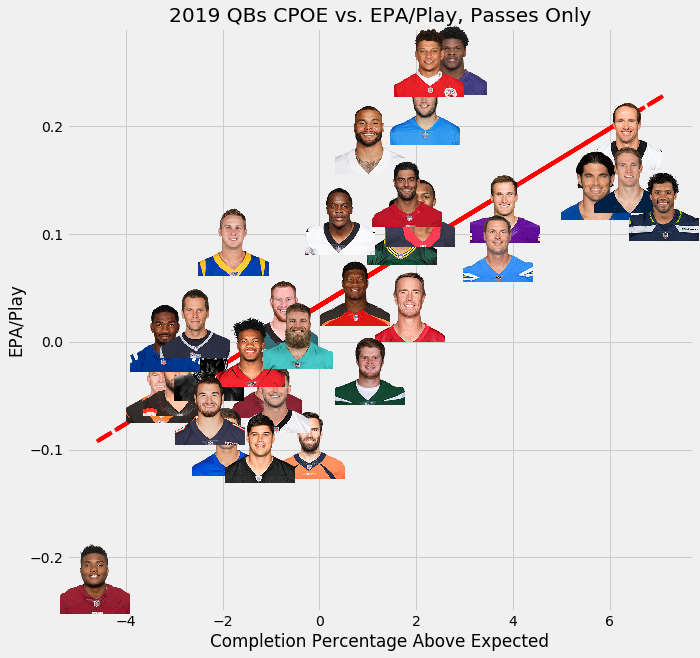

In [212]:
# fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,10))
# ax.add_subplot()
ax.scatter(x, y) 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
ax.set_title('2019 QBs CPOE vs. EPA/Play, Passes Only')
ax.set_xlabel('Completion Percentage Above Expected')
ax.set_ylabel('EPA/Play')


for x0, y0, path in zip(x, y,paths):
#     print(path)
    try:
        img = getImage(path)
#         response = requests.get(path)
#         img = Image.open(BytesIO(response.content))
        ab = AnnotationBbox(img, (x0, y0), frameon=False)
        ax.add_artist(ab)
    except:
#          ab = AnnotationBbox(getImage('https://nypost.com/wp-content/uploads/sites/2/2020/04/giants-gm-dave-gettleman.jpg?quality=80&strip=all'))
        print('Issue')